In [ ]:
# libraries to be installed
!pip install -q -U keras-tuner
!pip install tensorflow
!pip install keras==2.12.0

# Import libraries

In [ ]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.model_selection import cross_val_score

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
import kerastuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Import dataset

In [8]:
path = 'insurance_claims.csv'

In [9]:
data  = pd.read_csv(path)

# Exploratory data analysis

In [10]:
data.head(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   
5                 256   39         104594       2006-10-12           OH   
6                 137   34         413978       2000-06-04           IN   
7                 165   37         429027       1990-02-03           IL   
8                  27   33         485665       1997-02-05           IL   
9                 212   42         636550       2011-07-25           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   
5    250/500               1000                1351.10               0   
6    250/500               1000                1333.35               0   
7    100/300               1000                1137.03               0   
8    100/300                500                1442.99               0   
9    100/300                500                1315.68               0   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   
5       478456  ...                      NO              64100         6410   
6       441716  ...                       ?              78650        21450   
7       603195  ...                     YES              51590         9380   
8       601734  ...                     YES              27700         2770   
9       600983  ...                       ?              42300         4700   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   
5           6410         51280       Saab          95      2003   
6           7150         50050     Nissan  Pathfinder      2012   
7           9380         32830       Audi          A5      2015   
8           2770         22160     Toyota       Camry      2012   
9           4700         32900       Saab         92x      1996   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  
5              Y  NaN  
6              N  NaN  
7              N  NaN  
8              N  NaN  
9              N  NaN  

[10 rows x 40 columns]

In [ ]:
# the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
data.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

### explore missing values in variables

In [ ]:
# checking for null values
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                         0
police_report_available           0
total_claim_amount                0
injury_claim                      0
property_claim                    0
vehicle_claim                     0
auto_make                         0
auto_model                        0
auto_year                         0
fraud_reported                    0
_c39                           1000
dtype: int64

<Axes: >

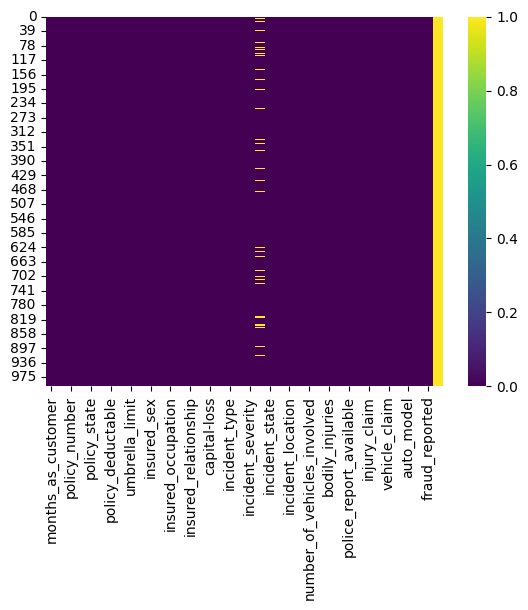

In [ ]:
sns.heatmap(data = data.isnull(), cmap = 'viridis')

In [ ]:
data['authorities_contacted'].isnull().sum()

91

In [ ]:
data['authorities_contacted'].unique()

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

In [ ]:
# checking distribution of the column
data['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [11]:
# Filling null value
data['authorities_contacted'].fillna('other',inplace=True)

In [12]:
# correcting values
data['property_damage'].replace("?","other",inplace=True)
data['police_report_available'].replace("?","other",inplace=True)
data['collision_type'].replace("?","other",inplace=True)

In [13]:
# dropping '_c39'
data = data.drop(columns = '_c39')

In [14]:
# numeric features
data_num = data[['months_as_customer','age','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains',
             'capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount',
             'injury_claim','property_claim','vehicle_claim']]

In [15]:
# categorical features
data_cat = data[['policy_state','insured_sex','insured_education_level','insured_occupation','insured_hobbies',
                 'insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state'
                ,'incident_city','incident_location','property_damage','police_report_available','auto_make','fraud_reported']]

In [16]:
data_cat

policy_state insured_sex insured_education_level insured_occupation  \
0             OH        MALE                      MD       craft-repair   
1             IN        MALE                      MD  machine-op-inspct   
2             OH      FEMALE                     PhD              sales   
3             IL      FEMALE                     PhD       armed-forces   
4             IL        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995           OH      FEMALE                 Masters       craft-repair   
996           IL      FEMALE                     PhD     prof-specialty   
997           OH      FEMALE                 Masters       armed-forces   
998           IL        MALE               Associate  handlers-cleaners   
999           OH      FEMALE               Associate              sales   

    insured_hobbies insured_relationship             incident_type  \
0          sleeping              husband  Single Vehicle Collision   
1           reading       other-relative             Vehicle Theft   
2       board-games            own-child   Multi-vehicle Collision   
3       board-games            unmarried  Single Vehicle Collision   
4       board-games            unmarried             Vehicle Theft   
..              ...                  ...                       ...   
995       paintball            unmarried  Single Vehicle Collision   
996        sleeping                 wife  Single Vehicle Collision   
997  bungie-jumping       other-relative   Multi-vehicle Collision   
998    base-jumping                 wife  Single Vehicle Collision   
999        kayaking              husband                Parked Car   

      collision_type incident_severity authorities_contacted incident_state  \
0     Side Collision      Major Damage                Police             SC   
1              other      Minor Damage                Police             VA   
2     Rear Collision      Minor Damage                Police             NY   
3    Front Collision      Major Damage                Police             OH   
4              other      Minor Damage                 other             NY   
..               ...               ...                   ...            ...   
995  Front Collision      Minor Damage                  Fire             NC   
996   Rear Collision      Major Damage                  Fire             SC   
997   Side Collision      Minor Damage                Police             NC   
998   Rear Collision      Major Damage                 Other             NY   
999            other      Minor Damage                Police             WV   

    incident_city    incident_location property_damage  \
0        Columbus       9935 4th Drive             YES   
1       Riverwood         6608 MLK Hwy           other   
2        Columbus    7121 Francis Lane              NO   
3       Arlington     6956 Maple Drive           other   
4       Arlington         3041 3rd Ave              NO   
..            ...                  ...             ...   
995    Northbrook   6045 Andromedia St             YES   
996     Northbend     3092 Texas Drive             YES   
997     Arlington          7629 5th St           other   
998     Arlington        6128 Elm Lane           other   
999      Columbus  1416 Cherokee Ridge           other   

    police_report_available   auto_make fraud_reported  
0                       YES        Saab              Y  
1                     other    Mercedes              Y  
2                        NO       Dodge              N  
3                        NO   Chevrolet              Y  
4                        NO      Accura              N  
..                      ...         ...            ...  
995                   other       Honda              N  
996                   other  Volkswagen              N  
997                     YES      Suburu              N  
998                     YES        Audi       

In [17]:
data_num

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                   328   48               1000                1406.91   
1                   228   42               2000                1197.22   
2                   134   29               2000                1413.14   
3                   256   41               2000                1415.74   
4                   228   44               1000                1583.91   
..                  ...  ...                ...                    ...   
995                   3   38               1000                1310.80   
996                 285   41               1000                1436.79   
997                 130   34                500                1383.49   
998                 458   62               2000                1356.92   
999                 456   60               1000                 766.19   

     umbrella_limit  insured_zip  capital-gains  capital-loss  \
0                 0       466132          53300             0   
1           5000000       468176              0             0   
2           5000000       430632          35100             0   
3           6000000       608117          48900        -62400   
4           6000000       610706          66000        -46000   
..              ...          ...            ...           ...   
995               0       431289              0             0   
996               0       608177          70900             0   
997         3000000       442797          35100             0   
998         5000000       441714              0             0   
999               0       612260              0             0   

     incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
0                           5                            1                1   
1                           8                            1                0   
2                           7                            3                2   
3                           5                            1                1   
4                          20                            1                0   
..                        ...                          ...              ...   
995                        20                            1                0   
996                        23                            1                2   
997                         4                            3                2   
998                         2                            1                0   
999                         6                            1                0   

     witnesses  total_claim_amount  injury_claim  property_claim  \
0            2               71610          6510           13020   
1            0                5070           780             780   
2            3               34650          7700            3850   
3            2               63400          6340            6340   
4            1                6500          1300             650   
..         ...                 ...           ...             ...   
995          1               87200         17440            8720   
996          3              108480         18080           18080   
997          3               67500          7500            7500   
998          1               46980          5220            5220   
999          3                5060           460             920   

     vehicle_claim  
0            52080  
1             3510  
2            23100  
3            50720  
4             4550  
..             ...  
995          61040  
996          72320  
997          52500  
998          36540  
999           3680  

[1000 rows x 16 columns]

### Summary of variables


- There are 16 numerical variables in the dataset.


- 12 are continuous variables and 4 is discrete variable. 


- There are 17 categorical variables in the dataset.


- There are no missing values in the dataset.

# Data Visualization

### Check the distribution of variables


plot the histograms to check distributions to find out if they are normal or skewed. 

array([[<Axes: title={'center': 'months_as_customer'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'policy_deductable'}>,
        <Axes: title={'center': 'policy_annual_premium'}>],
       [<Axes: title={'center': 'umbrella_limit'}>,
        <Axes: title={'center': 'insured_zip'}>,
        <Axes: title={'center': 'capital-gains'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'incident_hour_of_the_day'}>,
        <Axes: title={'center': 'number_of_vehicles_involved'}>,
        <Axes: title={'center': 'bodily_injuries'}>,
        <Axes: title={'center': 'witnesses'}>],
       [<Axes: title={'center': 'total_claim_amount'}>,
        <Axes: title={'center': 'injury_claim'}>,
        <Axes: title={'center': 'property_claim'}>,
        <Axes: title={'center': 'vehicle_claim'}>]], dtype=object)

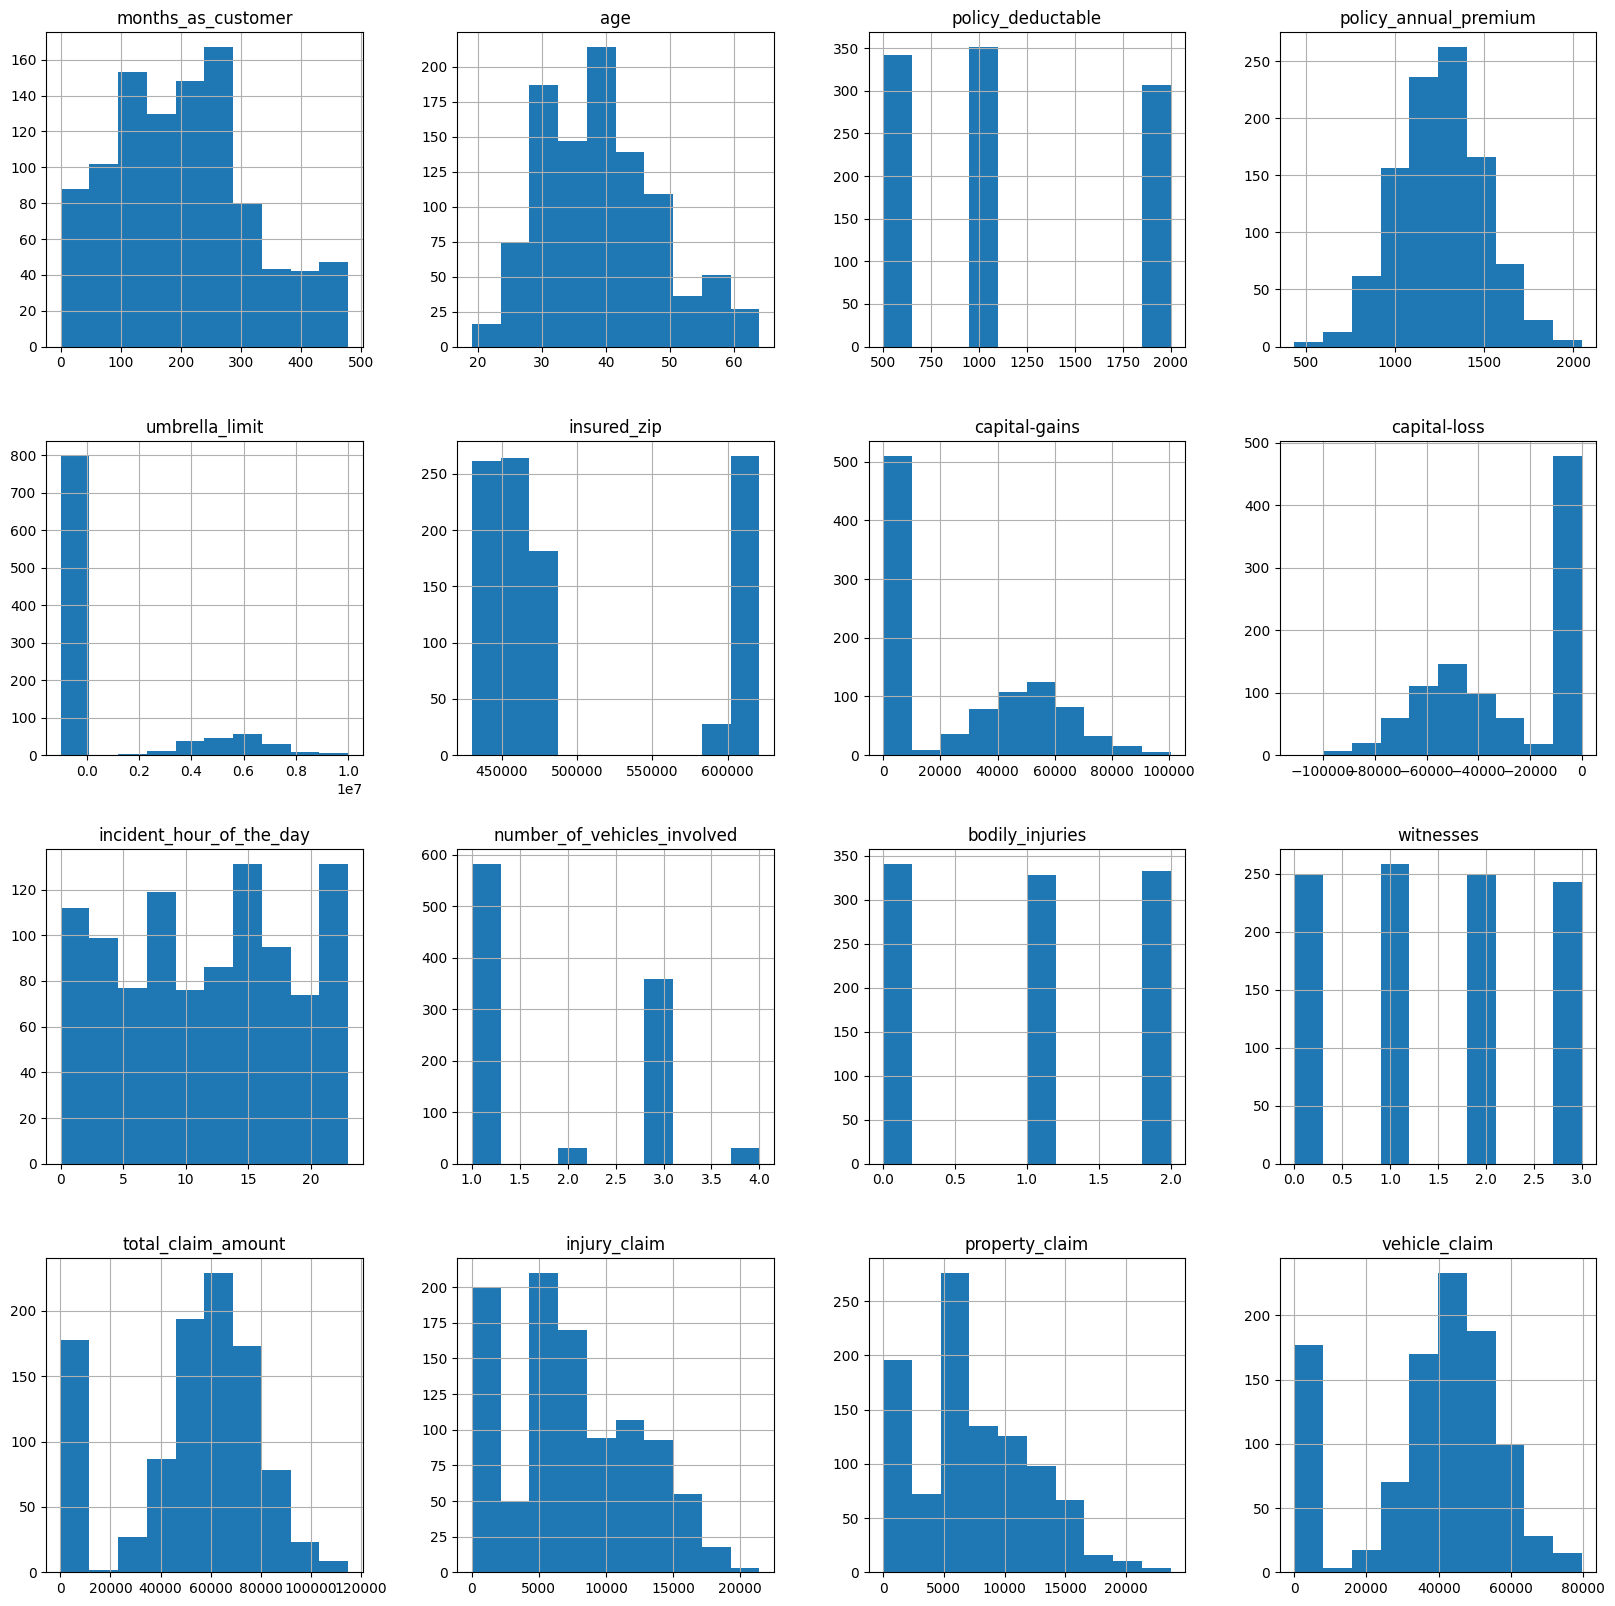

In [ ]:
data_num.hist(figsize = (20,20))

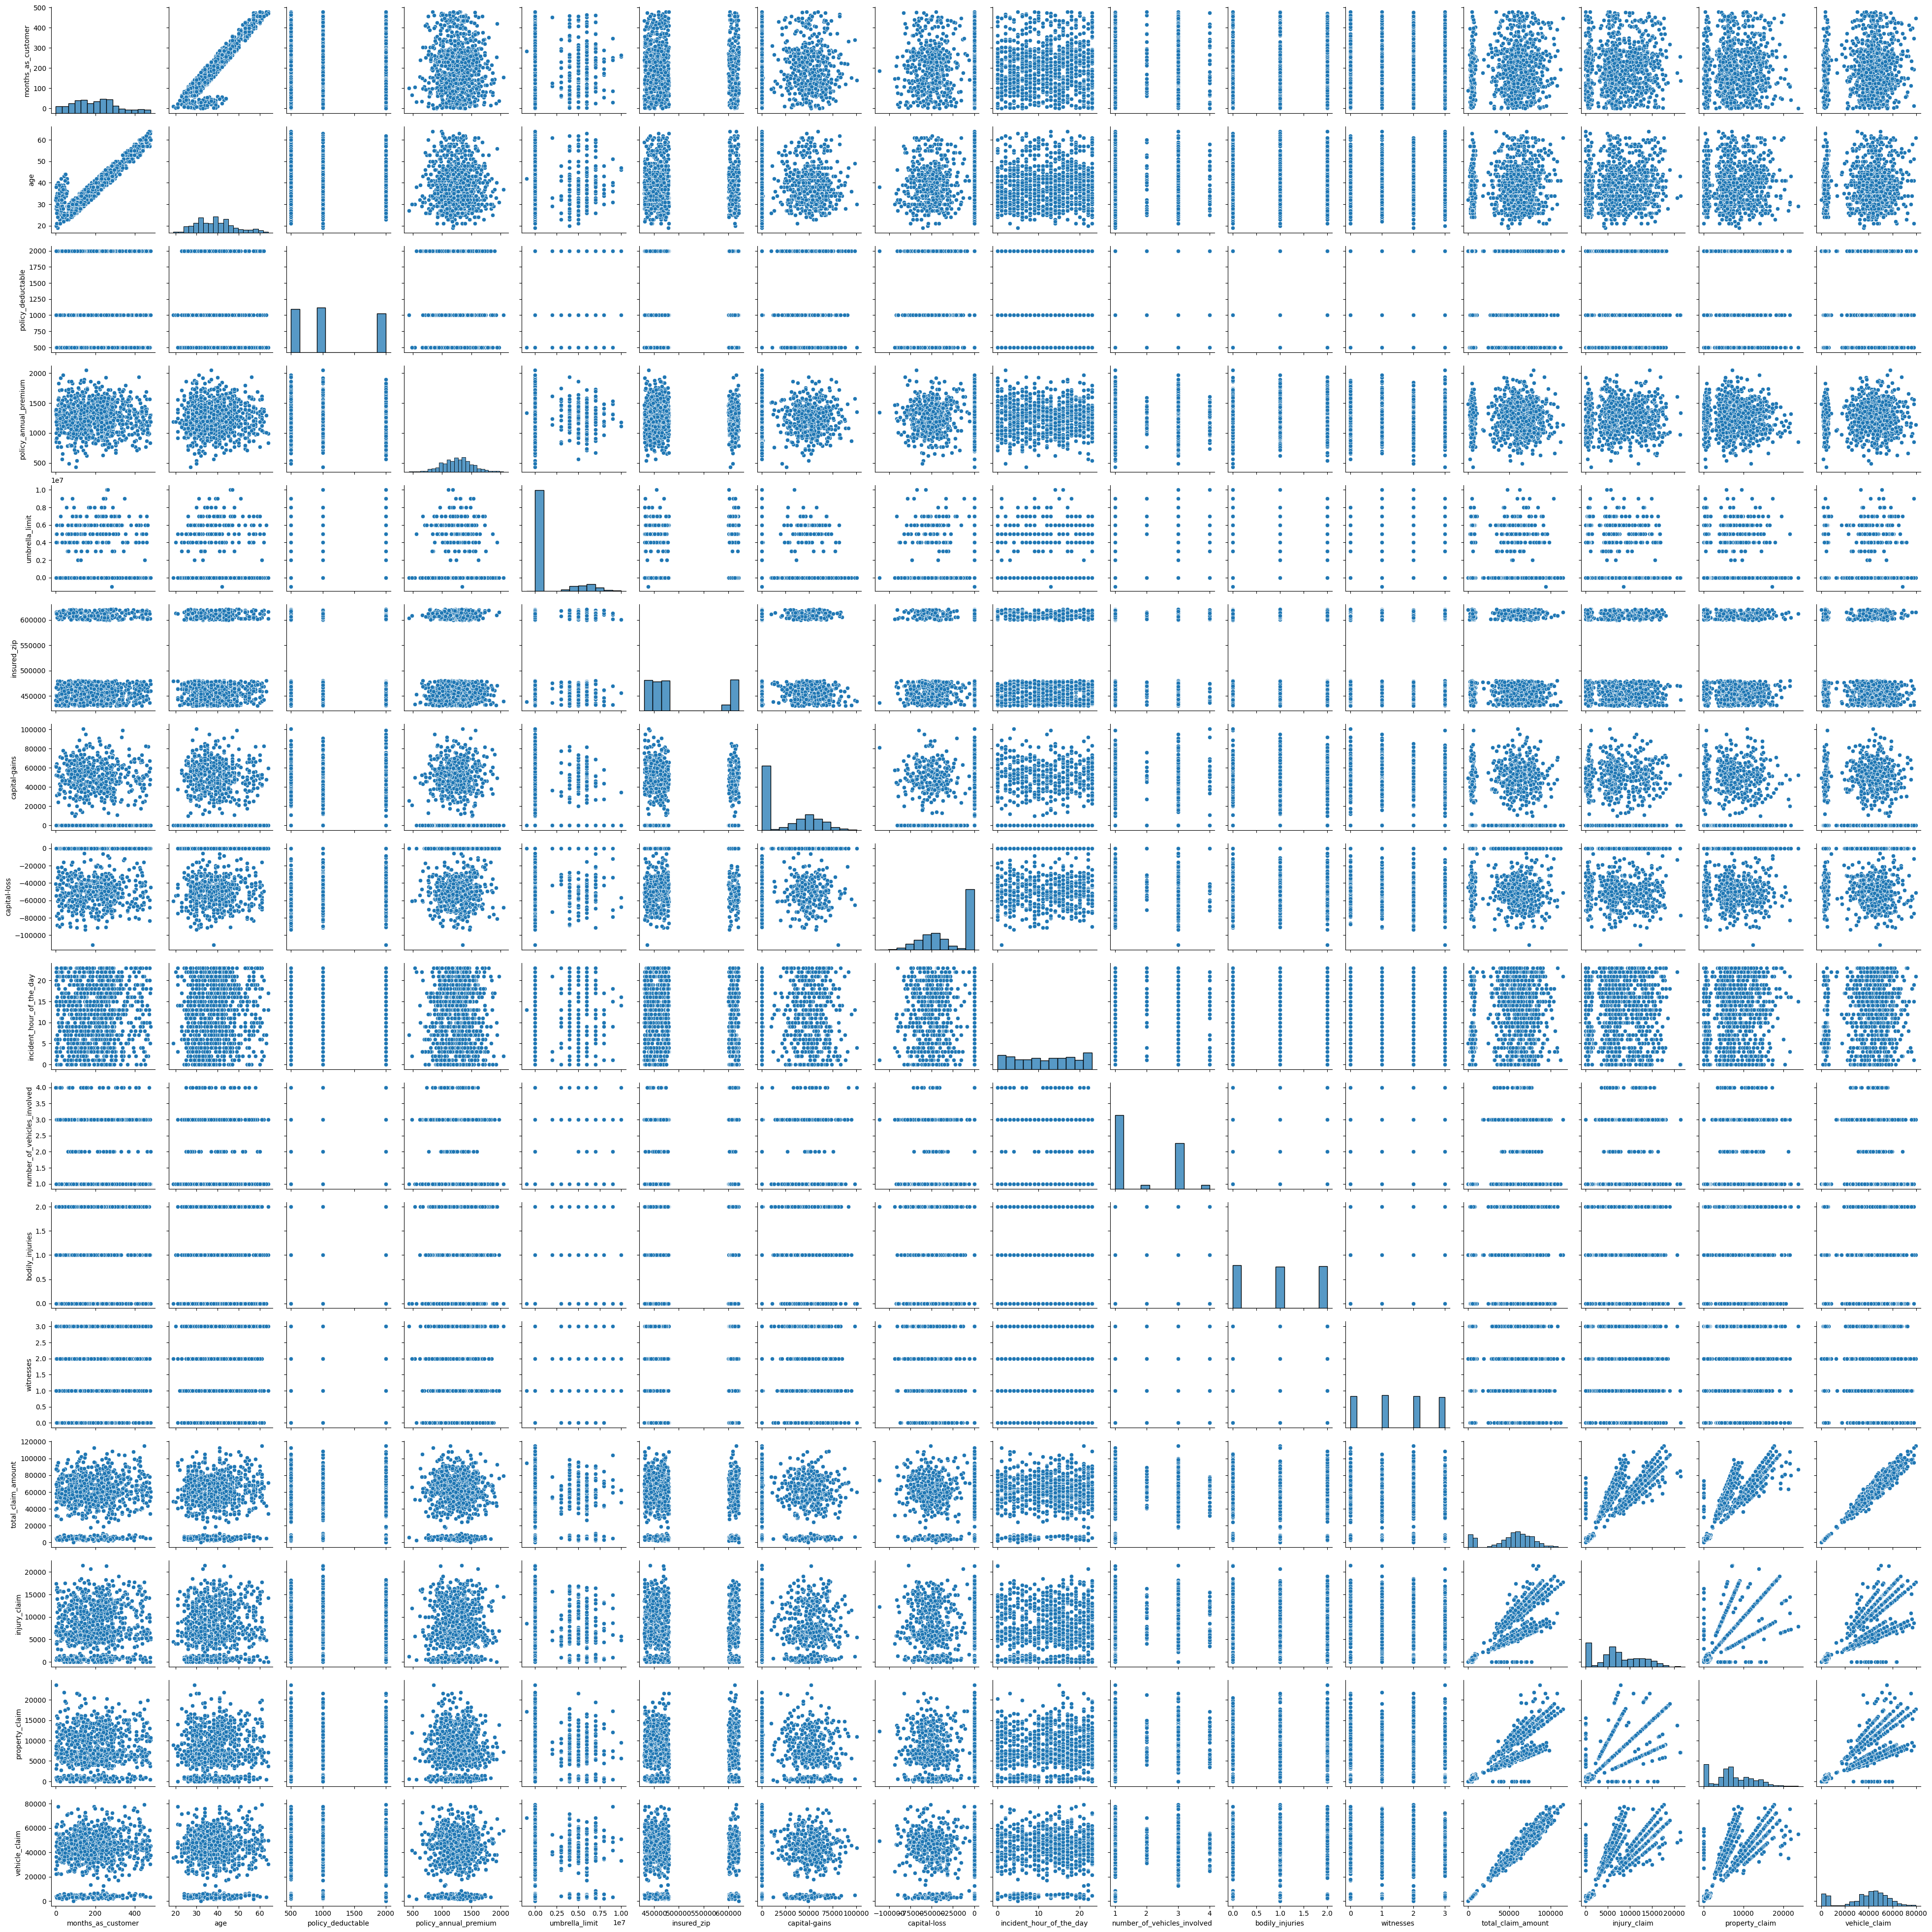

In [ ]:
sns.pairplot(data = data_num)

<Axes: ylabel='age'>

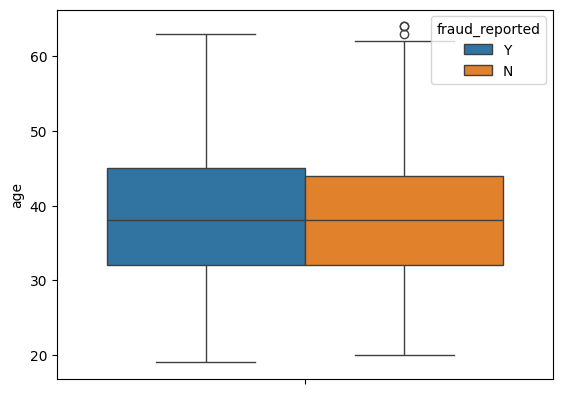

In [ ]:
sns.boxplot(data = data, y = 'age' , hue = 'fraud_reported')

<Axes: ylabel='policy_annual_premium'>

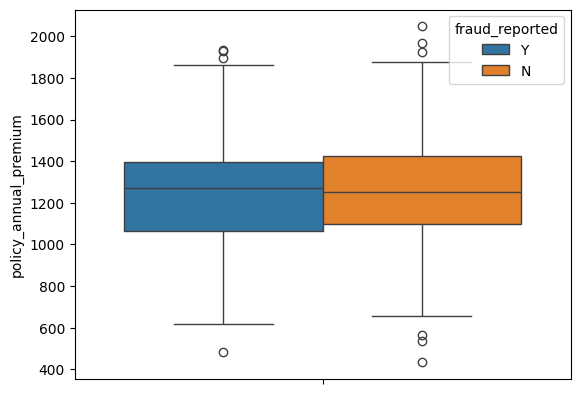

In [ ]:
sns.boxplot(data = data , y = 'policy_annual_premium', hue = 'fraud_reported')

<Axes: ylabel='months_as_customer'>

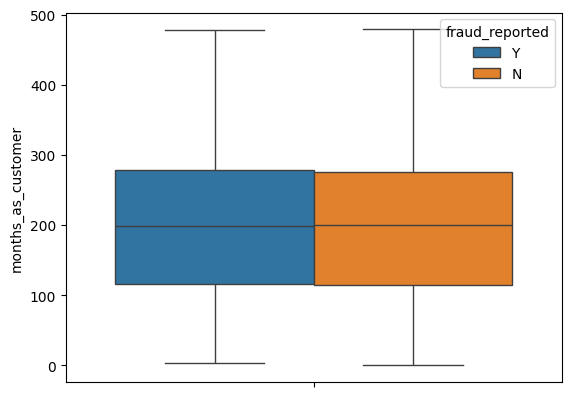

In [ ]:
sns.boxplot(data = data, y = 'months_as_customer' , hue = 'fraud_reported')

<Axes: xlabel='collision_type', ylabel='count'>

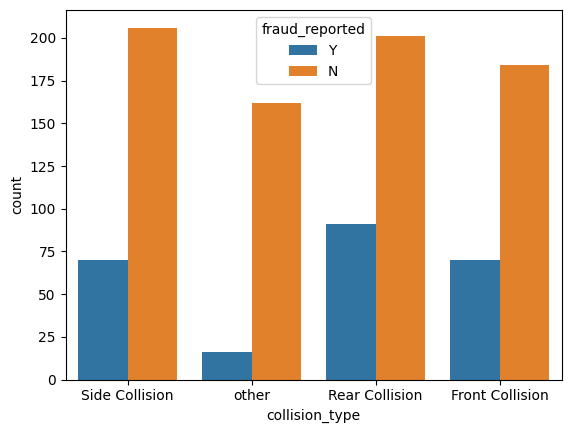

In [ ]:
sns.countplot(data = data, x = 'collision_type', hue = 'fraud_reported')

<Axes: xlabel='count', ylabel='auto_make'>

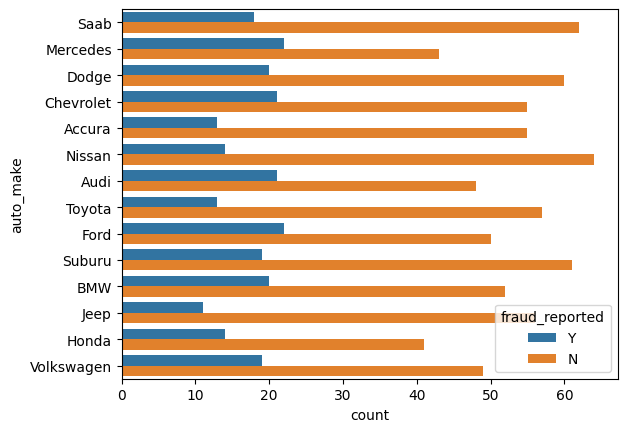

In [ ]:
sns.countplot(data=data, y = 'auto_make', hue = 'fraud_reported')

<Axes: xlabel='count', ylabel='insured_education_level'>

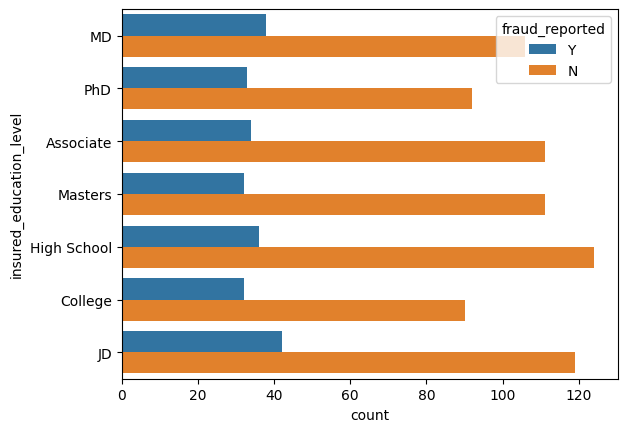

In [ ]:
sns.countplot(data = data , y='insured_education_level', hue='fraud_reported')

<Axes: xlabel='count', ylabel='incident_city'>

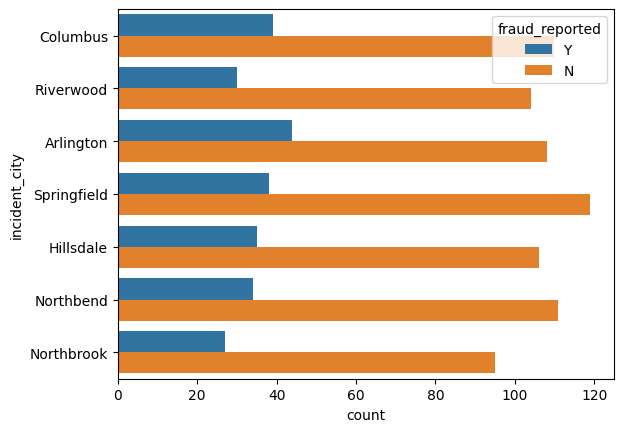

In [ ]:
sns.countplot(data = data , y='incident_city', hue='fraud_reported')

<Axes: xlabel='insured_sex', ylabel='count'>

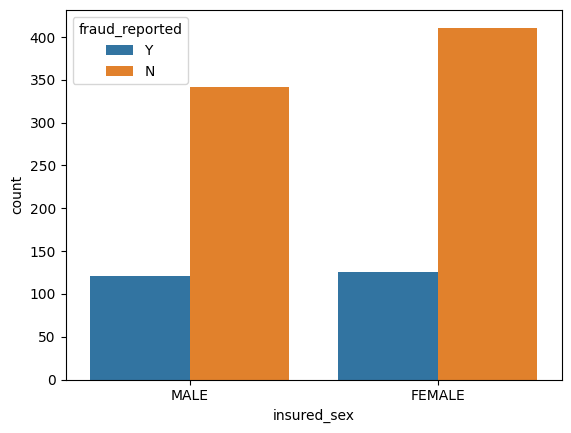

In [ ]:
sns.countplot(data = data , x='insured_sex', hue='fraud_reported')

<Axes: xlabel='insured_sex', ylabel='policy_annual_premium'>

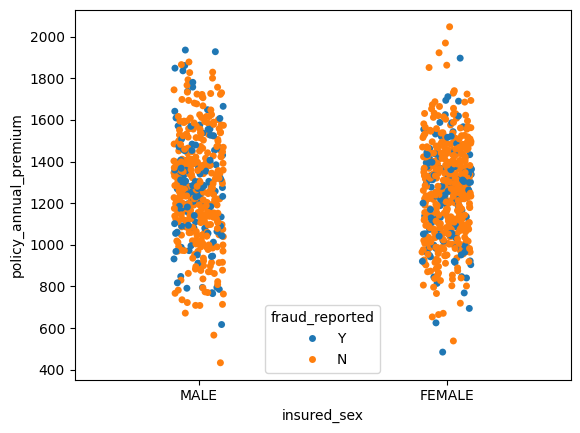

In [ ]:
sns.stripplot(data = data , y = 'policy_annual_premium', x = 'insured_sex', hue = 'fraud_reported')

<Axes: xlabel='policy_annual_premium', ylabel='incident_city'>

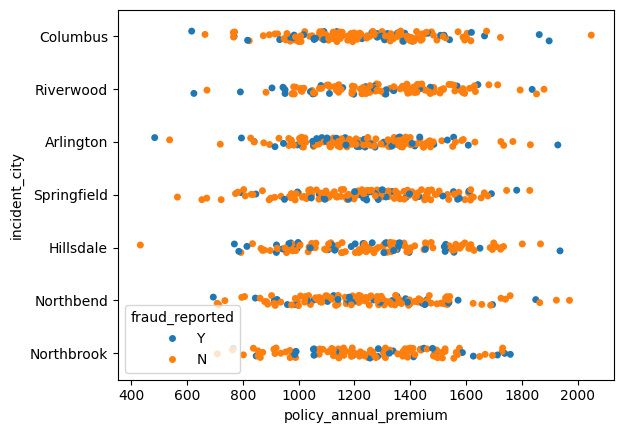

In [ ]:
sns.stripplot(data = data, x = 'policy_annual_premium', y = 'incident_city', hue = 'fraud_reported')

<Axes: xlabel='age', ylabel='policy_annual_premium'>

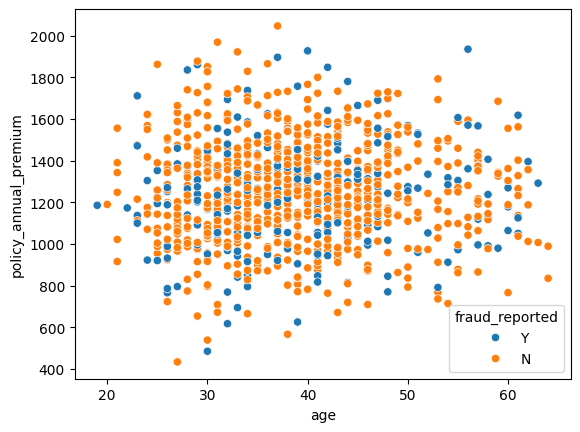

In [ ]:
sns.scatterplot(data = data , x = 'age', y = 'policy_annual_premium', hue = 'fraud_reported')

## Encoding categorical features

In [18]:
le=LabelEncoder()
data_cat['policy_state']=le.fit_transform(data_cat['policy_state'])
data_cat['insured_sex']=le.fit_transform(data_cat['insured_sex'])
data_cat['insured_education_level']=le.fit_transform(data_cat['insured_education_level'])
data_cat['insured_occupation']=le.fit_transform(data_cat['insured_occupation'])
data_cat['insured_hobbies']=le.fit_transform(data_cat['insured_hobbies'])
data_cat['insured_relationship']=le.fit_transform(data_cat['insured_relationship'])
data_cat['incident_type']=le.fit_transform(data_cat['incident_type'])
data_cat['collision_type']=le.fit_transform(data_cat['collision_type'])
data_cat['incident_severity']=le.fit_transform(data_cat['incident_severity'])
data_cat['authorities_contacted']=le.fit_transform(data_cat['authorities_contacted'])
data_cat['incident_state']=le.fit_transform(data_cat['incident_state'])
data_cat['incident_city']=le.fit_transform(data_cat['incident_city'])
data_cat['incident_location']=le.fit_transform(data_cat['incident_location'])
data_cat['property_damage']=le.fit_transform(data_cat['property_damage'])
data_cat['police_report_available']=le.fit_transform(data_cat['police_report_available'])
data_cat['auto_make']=le.fit_transform(data_cat['auto_make'])
data_cat['fraud_reported']=le.fit_transform(data_cat['fraud_reported'])
data_cat.head()

C:\Users\Ankush Ghosh\AppData\Local\Temp\ipykernel_98844\2537684061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['policy_state']=le.fit_transform(data_cat['policy_state'])
C:\Users\Ankush Ghosh\AppData\Local\Temp\ipykernel_98844\2537684061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['insured_sex']=le.fit_transform(data_cat['insured_sex'])
C:\Users\Ankush Ghosh\AppData\Local\Temp\ipykernel_98844\2537684061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

policy_state  insured_sex  insured_education_level  insured_occupation  \
0             2            1                        4                   2   
1             1            1                        4                   6   
2             2            0                        6                  11   
3             0            0                        6                   1   
4             0            1                        0                  11   

   insured_hobbies  insured_relationship  incident_type  collision_type  \
0               17                     0              2               2   
1               15                     2              3               3   
2                2                     3              0               1   
3                2                     4              2               0   
4                2                     4              3               3   

   incident_severity  authorities_contacted  incident_state  incident_city  \
0                  0                      3               4              1   
1                  1                      3               5              5   
2                  1                      3               1              1   
3                  0                      3               2              0   
4                  1                      4               1              0   

   incident_location  property_damage  police_report_available  auto_make  \
0                996                1                        1         10   
1                628                2                        2          8   
2                685                0                        0          4   
3                669                2                        0          3   
4                220                0                        0          0   

   fraud_reported  
0               1  
1               1  
2               0  
3               1  
4               0

In [19]:
# combining numerical & categorical features
data_final = pd.concat([data_num, data_cat], axis=1)

In [20]:
data_final

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                   328   48               1000                1406.91   
1                   228   42               2000                1197.22   
2                   134   29               2000                1413.14   
3                   256   41               2000                1415.74   
4                   228   44               1000                1583.91   
..                  ...  ...                ...                    ...   
995                   3   38               1000                1310.80   
996                 285   41               1000                1436.79   
997                 130   34                500                1383.49   
998                 458   62               2000                1356.92   
999                 456   60               1000                 766.19   

     umbrella_limit  insured_zip  capital-gains  capital-loss  \
0                 0       466132          53300             0   
1           5000000       468176              0             0   
2           5000000       430632          35100             0   
3           6000000       608117          48900        -62400   
4           6000000       610706          66000        -46000   
..              ...          ...            ...           ...   
995               0       431289              0             0   
996               0       608177          70900             0   
997         3000000       442797          35100             0   
998         5000000       441714              0             0   
999               0       612260              0             0   

     incident_hour_of_the_day  number_of_vehicles_involved  ...  \
0                           5                            1  ...   
1                           8                            1  ...   
2                           7                            3  ...   
3                           5                            1  ...   
4                          20                            1  ...   
..                        ...                          ...  ...   
995                        20                            1  ...   
996                        23                            1  ...   
997                         4                            3  ...   
998                         2                            1  ...   
999                         6                            1  ...   

     collision_type  incident_severity  authorities_contacted  incident_state  \
0                 2                  0                      3               4   
1                 3                  1                      3               5   
2                 1                  1                      3               1   
3                 0                  0                      3               2   
4                 3                  1                      4               1   
..              ...                ...                    ...             ...   
995               0                  1                      1               0   
996               1                  0                      1               4   
997               2                  1                      3               0   
998               1                  0                      2               1   
999               3                  1                      3               6   

     incident_city  incident_location  property_damage  \
0                1                996                1   
1                5                628                2   
2                1                685                0   
3                0                669                2   
4                0                220                0   
..             ...                ...              ...   
995              4                561                1   
996              3                227                1   
997              0                7

## Declare feature vector and target variable

In [21]:
# splitting dependent & independent features
x = data_final.iloc[:,0:-1]
y = data_final.iloc[:,-1]

## Split data into separate training and test set

In [22]:
# splitting training & testing set
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.3, stratify=y)

## Feature Scaling

In [23]:
# Feature scaling
scaler  = MinMaxScaler()
x_train[data_num.columns] = scaler.fit_transform(x_train[data_num.columns])
x_test[data_num.columns] = scaler.transform(x_test[data_num.columns])

# Hyperparameter tuning using Keras Tuner

In [24]:
# Model creation using keras tuner
def build_model(hp):
  model = Sequential()
  model.add(Dense(units = hp.Int('inputUnits', min_value = 8, max_value = 30), kernel_initializer= 'uniform', activation= 'relu', input_dim = 32))
  for i in range(hp.Int("numlayers", min_value = 1, max_value = 4)):
    model.add(Dense(units = hp.Int('inputUnits', min_value = 8, max_value = 30), kernel_initializer= 'uniform', activation= 'relu'))
  model.add(Dense(units=1, kernel_initializer='uniform', activation= 'sigmoid'))
  model.compile(optimizer = Adam(hp.Choice('learning_rate', [0.01, 0.001, 0.02, 0.002])), loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [25]:
# callback to stop training early after reaching a certain value for the validation loss
stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [26]:
tuner = RandomSearch(build_model , objective = 'val_accuracy' )

C:\Users\Ankush Ghosh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
tuner.search(x = x_train, y = y_train , epochs = 100, validation_data = (x_test, y_test) , callbacks=[stop_early])

Trial 10 Complete [00h 00m 03s]
val_accuracy: 0.753333330154419

Best val_accuracy So Far: 0.8166666626930237
Total elapsed time: 00h 00m 41s


In [28]:
# all the possible models
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 05 summary
Hyperparameters:
inputUnits: 25
numlayers: 2
learning_rate: 0.002
Score: 0.8166666626930237

Trial 06 summary
Hyperparameters:
inputUnits: 29
numlayers: 2
learning_rate: 0.002
Score: 0.8100000023841858

Trial 07 summary
Hyperparameters:
inputUnits: 9
numlayers: 1
learning_rate: 0.01
Score: 0.79666668176651

Trial 03 summary
Hyperparameters:
inputUnits: 20
numlayers: 3
learning_rate: 0.01
Score: 0.7799999713897705

Trial 08 summary
Hyperparameters:
inputUnits: 9
numlayers: 4
learning_rate: 0.002
Score: 0.7699999809265137

Trial 02 summary
Hyperparameters:
inputUnits: 18
numlayers: 2
learning_rate: 0.01
Score: 0.7599999904632568

Trial 00 summary
Hyperparameters:
inputUnits: 25
numlayers: 1
learning_rate: 0.001
Score: 0.7566666603088379

Trial 01 summary
Hyperparameters:
inputUnits: 8
numlayers: 4
learning_rate: 0.002
Score: 0.753333330154419

Trial 04 su

In [29]:
# Best hyperparameters
tuner.get_best_hyperparameters()[0].values

{'inputUnits': 25, 'numlayers': 2, 'learning_rate': 0.002}

In [30]:
# Best model
tuner.get_best_models()[0].summary()

C:\Users\Ankush Ghosh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Ankush Ghosh\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 25)                  │             825 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,151 (8.40 KB)

 Trainable params: 2,151 (8.40 KB)

 Non-trainable params: 0 (0.00 B)

### Creating the model


creating the model using the information provided by keras tuner

In [ ]:
# proposed model
f_model = Sequential()
f_model.add(Dense(units = 25 , kernel_initializer= 'uniform', activation= 'relu', input_dim = 32))
f_model.add(Dense(units = 25 , kernel_initializer= 'uniform', activation= 'relu'))
f_model.add(Dense(units = 25 , kernel_initializer= 'uniform', activation= 'relu'))
f_model.add(Dense(units=1, kernel_initializer='uniform', activation= 'sigmoid'))
f_model.compile(optimizer = Adam(0.002), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
f_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 25)                  │             825 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,151 (8.40 KB)

 Trainable params: 2,151 (8.40 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# initial weights before training
f_model.get_weights()

[array([[ 0.03255821, -0.04883367,  0.02083847, -0.04410999,  0.0191845 ,
         -0.01315218, -0.01701134,  0.03734359,  0.03881946,  0.019188  ,
          0.0195011 ,  0.00611567, -0.03217479,  0.03086254,  0.04256615,
         -0.04614839,  0.01397682, -0.02133108, -0.01517594,  0.04036988,
          0.01926228, -0.04901563, -0.04211284, -0.01531034,  0.0465053 ],
        [ 0.01210787,  0.02006217, -0.01838351,  0.01188288,  0.01832991,
         -0.00492793,  0.02682504, -0.02349831, -0.01766164,  0.0474438 ,
         -0.00577085,  0.03983387,  0.02095788,  0.02572756,  0.02483207,
          0.02646026,  0.0441317 ,  0.03554276,  0.01801519, -0.00324821,
         -0.03071618, -0.00990967,  0.04564158,  0.0246065 , -0.04476371],
        [-0.00030297, -0.01945696,  0.02809535, -0.00369667,  0.0334303 ,
         -0.04289752, -0.03708688, -0.03359792,  0.0284502 , -0.02028997,
          0.02235972, -0.02800853,  0.03767046, -0.03858732, -0.02796515,
          0.01722229, -0.01955433, -

In [34]:
# training the model
hist = f_model.fit(x_train, y_train, epochs = 100 , validation_data = (x_test, y_test) , callbacks=[stop_early] )

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6467 - loss: 0.6661 - val_accuracy: 0.7533 - val_loss: 0.5973
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7450 - loss: 0.5823 - val_accuracy: 0.7533 - val_loss: 0.5782
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7554 - loss: 0.5713 - val_accuracy: 0.7533 - val_loss: 0.5784
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7681 - loss: 0.5365 - val_accuracy: 0.7533 - val_loss: 0.5936
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7410 - loss: 0.5838 - val_accuracy: 0.7533 - val_loss: 0.5770
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7497 - loss: 0.5710 - val_accuracy: 0.7533 - val_loss: 0.5563
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7424 - loss: 0.5716 - val_accuracy: 0.7533 - val_loss: 0.5590
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7358 - loss: 0.5805 - val_accuracy: 0.7533 - 

In [35]:
# weights after training
f_model.get_weights()

[array([[-9.89600942e-02, -1.97954029e-01, -8.71174186e-02,
         -1.52409345e-01, -1.54261246e-01, -1.76557358e-02,
         -1.70113444e-02, -8.45018923e-02,  3.88194583e-02,
         -1.28564328e-01, -7.14588910e-02, -7.61272162e-02,
         -3.43021154e-02, -5.04839681e-02,  2.41472907e-02,
         -1.51877835e-01, -1.32836223e-01, -1.85198724e-01,
         -1.41085878e-01, -7.90206939e-02, -1.58136442e-01,
         -5.51827624e-02, -1.27284080e-01, -2.18378715e-02,
         -4.25522365e-02],
        [-1.33317867e-02, -3.45629752e-02, -4.70657013e-02,
         -7.64694856e-03, -1.23061538e-01, -8.86971597e-03,
          2.68250369e-02, -6.39861897e-02, -1.76616423e-02,
         -5.09582423e-02, -5.62943816e-02, -7.35503621e-03,
          1.89590398e-02, -3.61619517e-02,  5.98099222e-03,
         -2.20203530e-02, -1.85761731e-02, -4.33353446e-02,
         -2.77794152e-02, -4.86540347e-02, -9.01553929e-02,
         -1.55999437e-02,  5.14737777e-02,  1.85559653e-02,
         -5.5

In [36]:
# visualization of accuracy & loss
train_acc = hist.history['accuracy']
test_acc = hist.history['val_accuracy']
train_loss = hist.history['loss']
test_loss = hist.history['val_loss']
XC = range(51)

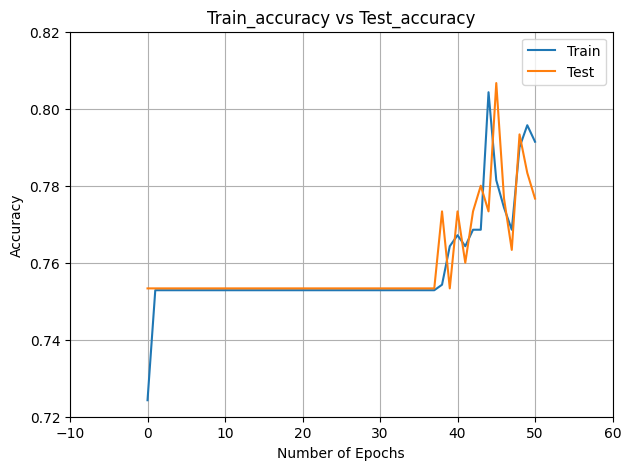

In [37]:
plt.figure(figsize = (7,5))
plt.plot(XC,train_acc)
plt.plot(XC , test_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Train_accuracy vs Test_accuracy')
plt.grid(True)
plt.legend(['Train', 'Test'])
plt.style.use(['classic'])

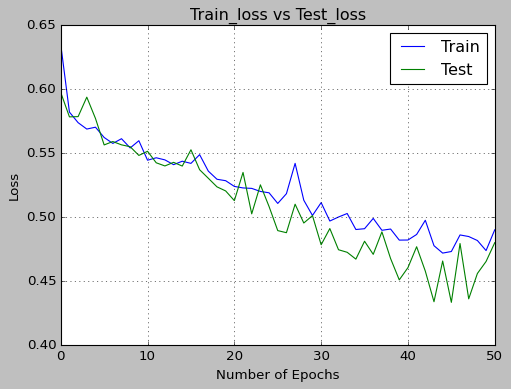

In [38]:
plt.figure(figsize = (7,5))
plt.plot(XC,train_loss)
plt.plot(XC , test_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Train_loss vs Test_loss')
plt.grid(True)
plt.legend(['Train', 'Test'])
plt.style.use(['classic'])

In [39]:
# prediction
y_pred = f_model.predict(x_test)
y_pred = np.round(y_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [40]:
# train score & accuracy
train_score = f_model.evaluate(x_train, y_train)
print("Train score",train_score[0])
print('Train accuracy', train_score[1])

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8116 - loss: 0.4884 
Train score 0.4932848811149597
Train accuracy 0.7971428632736206


In [41]:
# test score & accuracy
test_score = f_model.evaluate(x_test , y_test)
print("Test score",test_score[0])
print('Test accuracy', test_score[1])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7922 - loss: 0.4682 
Test score 0.4799370765686035
Test accuracy 0.7766666412353516


In [42]:
# Accuracy score
accuracy_score(y_test, y_pred)

0.7766666666666666

### Classification report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [43]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       226
           1       0.59      0.30      0.40        74

    accuracy                           0.78       300
   macro avg       0.70      0.62      0.63       300
weighted avg       0.75      0.78      0.75       300



# Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.

In [44]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[211  15]
 [ 52  22]]


In [45]:
print("True Positive:", cm[0,0])
print("False Positive:", cm[0,1])
print("False Negative:" , cm[1,0])
print("True Negative:" , cm[1,1],'\n')
print('Correct prediction:' , cm[0,0] + cm[1,1])
print('Incorrect prediction:' , cm[0,1] + cm[1,0])

True Positive: 211
False Positive: 15
False Negative: 52
True Negative: 22 

Correct prediction: 233
Incorrect prediction: 67


The confusion matrix shows `211 + 22 = 233 correct predictions` and `15 + 52 = 67 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 211


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 22


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 15 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 52 `(Type II error)`

In [46]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [47]:
cm_matrix = pd.DataFrame(data = cm , columns = ['Actual Positive' , 'Actual Negative'], index = ['Predicted Positive', 'Predicted Negative'])

In [48]:
cm_matrix

Actual Positive  Actual Negative
Predicted Positive              211               15
Predicted Negative               52               22

<Axes: >

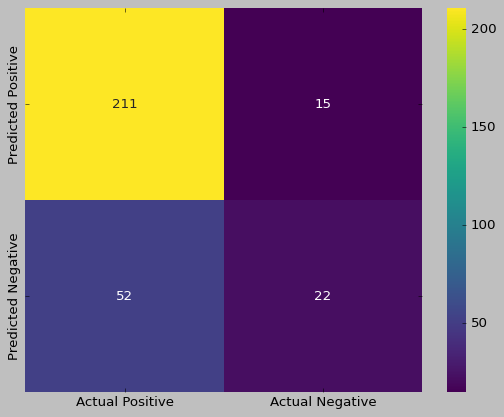

In [49]:
# visualize confusion matrix with seaborn heatmap
sns.heatmap(cm_matrix , annot = True, fmt = '.0f' , cmap = 'viridis')

### Classification metrices

### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.


### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, **recall** can be defined as the ratio of `TP to (TP + FN)`.

### True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [50]:
# Accuracy
print("Accuracy:", (TP+TN)/(TP+TN+FP+FN))
# Precision
print("Precision: ", (TP)/(TP+FP))
# Recall / True Positive rate / Sensitivity
print("Recall / Sensitivity: ", (TP)/(TP+FN))
# True Negative rate / Specificity
print("Specificity: ",(TN)/(TN+FP))
# False Negative rate / 1-Sensitivity
print("False Negative rate: ", (FN)/(FN+TP))
# False Positive rate / 1-Specificity
print("False Negative rate: ", (FP)/(FP+TN))

Accuracy: 0.7766666666666666
Precision:  0.9336283185840708
Recall / Sensitivity:  0.8022813688212928
Specificity:  0.5945945945945946
False Negative rate:  0.19771863117870722
False Negative rate:  0.40540540540540543


### f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.


In [51]:
# F1-Score
recall = (TP)/(TP+FN)
precision = (TP)/(TP+FP)
print('F1-score: ', (2*recall*precision)/(recall + precision))

F1-score:  0.8629856850715746


# ROC - AUC
ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

### ROC  AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [52]:
# ROC_AUC_score
roc_auc = roc_auc_score(y_test , y_pred)
print('ROC-AUC score: ', roc_auc)

ROC-AUC score:  0.6154628079406841


## 18. ROC - AUC



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN)`.



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN)`.



In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).



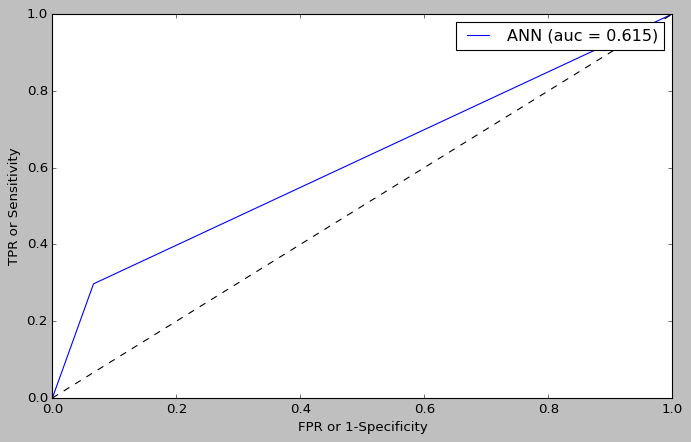

In [53]:
# ROC_AUC
fpr , tpr, threshold = roc_curve(y_test, y_pred)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr , label= 'ANN (auc = %0.3f)'%roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR or 1-Specificity')
plt.ylabel('TPR or Sensitivity')
plt.legend()
plt.show()